In [1]:
# Modules
import csv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import datetime
import random

# Functions
from implementations import *
from helpers import *

# Autoreload
%load_ext autoreload
%autoreload 2

# Set random seed
np.random.seed(1)

In [2]:
(labels_raw, data_raw, ids_raw) = load_csv_data("data/train.csv")
(t_labels, t_data_raw, t_ids) = load_csv_data("data/test.csv")

In [3]:
data_, data_t_, labels = process_data(data_raw, t_data_raw, labels_raw, ids_raw,sample_filtering = False, feature_filtering = False, replace = 'zero')
data, means, variance = standardize(data_)
# need to standardize test using moments calculated from training
data_t = standardize_test(data_t_, means, variance)

The original dimensions of the training data set was 250000 samples and 30 columns
 After feature and sample filtering, there are 250000 samples and 30 columns


In [11]:
def PCA(data, threshold = 1):
    cov_matrix = np.cov(data.T)
    eigenVal, eigenVec = np.linalg.eig(cov_matrix)

    idx = eigenVal.argsort()[::-1]   
    eigenVal = np.asarray(eigenVal[idx])
    eigenVec = np.asarray(eigenVec[:,idx])


    eigenVal=abs(eigenVal)/sum(abs(eigenVal))


    sumEigenVal = [0]
    k = 0
    while(sumEigenVal[-1]<threshold):
        sumEigenVal.append(sumEigenVal[-1] + eigenVal[k])
        k = k+1

    #keep only kth first dimension
    eigenVec=eigenVec[:,:(k)]
    
    return eigenVal,eigenVec,sumEigenVal

(30,)
(30, 9)
10


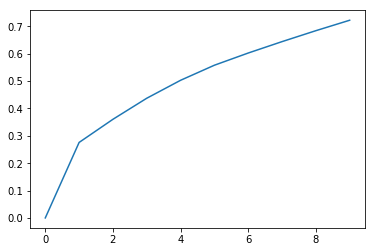

In [12]:
eigVal,eigVec,sumEigVal = PCA(data, threshold = 0.7)
plt.plot(sumEigVal)
print(eigVal.shape)
print(eigVec.shape)
print(len(sumEigVal))

In [ ]:

    
    
    
    eigen = eigen.astype(float)
    eigenvectors = eigenvectors.astype(float)


    # calculate the number of eigenvalues needed to retrieve desired percent
    percent = 0
    selected_eigenvalues = []
    selected_eigenvectors = []

    for i in np.arange(1,x.shape[0]):
        percent += eigen_sort[-i]/eigen_sort.sum()
        selected_eigenvalues.append(eigen_sort[-i])
        selected_eigenvectors.append(eigenvector_sort[-i])
        if percent > self.percent_rep:
            break

    self.eigenvalues = np.array(selected_eigenvalues)
    self.eigenvectors = np.array(selected_eigenvectors
    
    return 


class pca(object):
    """find principal components and order them by eigenvalue. comes with the two methods fit and transform"""
    def __init__(self, percent_rep):
        self.percent_rep = percent_rep # decimal value of the percent of the original data we want to represent
        self.eigenvectors = 0
        self.eigenvalues = 0

    def fit(self, x):
        import numpy as np
        # x is a dataset that is already standardized as a numpy matrix
        # create covariance matrix
        cov_matrix = np.cov(x.T)
        eigen, eigenvectors = np.linalg.eig(cov_matrix)

        eigen = eigen.astype(float)
        eigenvectors = eigenvectors.astype(float)
        eigen_sort = np.sort(eigen)
        eigenvector_sort = eigenvectors[np.argsort(eigen)]

        # calculate the number of eigenvalues needed to retrieve desired percent
        percent = 0
        selected_eigenvalues = []
        selected_eigenvectors = []

        for i in np.arange(1,x.shape[0]):
            percent += eigen_sort[-i]/eigen_sort.sum()
            selected_eigenvalues.append(eigen_sort[-i])
            selected_eigenvectors.append(eigenvector_sort[-i])
            if percent > self.percent_rep:
                break

        self.eigenvalues = np.array(selected_eigenvalues)
        self.eigenvectors = np.array(selected_eigenvectors)
        return self.eigenvalues, self.eigenvectors

    def transform(self, input):
        import numpy as np
        transformed = np.dot(self.eigenvectors, input.T).T
        return transformed

import requests
import pandas as pd
import numpy as np
import io
pull = requests.get('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv').content
data = io.StringIO(pull.decode('utf-8'))
iris = pd.read_csv(data, sep=',')
iris = iris.iloc[:,[0,1,2,3]]


pcomp = pca(percent_rep=0.7)
pcomp.fit(iris)
print(np.array(pcomp.transform(iris)).shape)
